# EPA1352 - Assignment 3: Network Generation & Analysis

Input files: 
- fully_cleaned_data.csv

Output files:
- A3_network.pdf
- network_betweenness_centralities.csv

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("fully_cleaned_data.csv")
df

,road,id,model_type,condition,name,lat,lon,length,type
0,N1,0,SourceSink,NaN,Start of Road after Jatrabari Flyover infront...,23.706028,90.443333,814.0,Others
1,N1,1,Link,NaN,Box Culvert,23.702917,90.450417,8.0,Culvert
2,N1,2,Link,NaN,Intersection with Z1101,23.702778,90.450472,178.0,CrossRoad
3,N1,3,Link,NaN,Km post missing,23.702139,90.451972,1000.0,KmPost
4,N1,4,Bridge,A,.,23.698739,90.458861,11.3,Box Culvert
...,...,...,...,...,...,...,...,...,...
7922,Z2013,7922,Link,NaN,Culvert,24.667222,91.827249,208.0,Culvert
7923,Z2013,7923,Link,NaN,Culvert,24.666250,91.825527,193.0,Culvert
7924,Z2013,7924,Link,NaN,Culvert,24.664722,91.825305,455.0,Culvert
7925,Z2013,7925,Link,NaN,Balaganj 1 km,24.662306,91.827833,575.0,KmPost


In [3]:
# edges are defined with 3 values: 2 nodes (i.e. id pairs) and the weight (i.e. length)
# (id_node1, id_node2, weight)
# save all nodes (sources & intersections) to a list
all_id_pairs_and_weights = []
# save all the ids of nodes (sources & intersections) to a list
all_nodes = set()

# for each road define links and nodes
roads = df.road.unique()
df_objects_all = []
for road in roads:
    df_objects_on_road = df[df['road'] == road]
    df_objects_on_road.reset_index(inplace=True, drop=True)
    path_length_list = []
    id_list = []
    road_pair_list = []
    partial_path_length = 0
    # start index prevents SourceSink length from being added to edge length
    startindex = 0

    # each SourceSink is a node
    # each Link is the length of all components between summed up
    for index, row in df_objects_on_road.iterrows():
        if (row['model_type'] == "SourceSink") or (row['model_type'] == "Intersection"):
            id_list.append(row['id'])
            all_nodes.add(row['id'])
            if startindex > 0:
                path_length_list.append(partial_path_length)
                partial_path_length = 0
            startindex +=1
        partial_path_length += int(row['length'])
        
    for i in range(len(id_list)-1):
        id_pair = (id_list[i],id_list[i+1], path_length_list[i])
        # print(id_pair)
        road_pair_list.append(id_pair)    
        all_id_pairs_and_weights.append(id_pair)
        
    print("for", road, "the id pairs and path length are:", road_pair_list, "\n")

all_nodes = list(all_nodes)
print("the list containing all nodes", all_nodes, "--->", len(all_nodes), "nodes in total\n")
print("the list containing all id pairs and weights", all_id_pairs_and_weights, "--->", len(all_id_pairs_and_weights), "edges in total\n")

for N1 the id pairs and path length are: [(0, 20, 9177), (20, 38, 3226), (38, 164, 36975), (164, 169, 1905), (169, 191, 8318), (191, 251, 26432), (251, 393, 46537), (393, 437, 10945), (437, 454, 6545), (454, 463, 3926), (463, 500, 18912), (500, 817, 82127), (817, 877, 16543), (877, 1094, 53204), (1094, 1172, 21645), (1172, 1966, 127989)] 

for N102 the id pairs and path length are: [(251, 2219, 65780), (2219, 2937, 18399)] 

for N104 the id pairs and path length are: [(2276, 454, 1883), (454, 2438, 48100)] 

for N105 the id pairs and path length are: [(38, 2620, 12845), (2620, 2555, 23848), (2555, 2600, 12756)] 

for N2 the id pairs and path length are: [(20, 2620, 11500), (2620, 2624, 532), (2624, 2683, 18389), (2683, 2741, 13077), (2741, 2872, 28729), (2872, 2937, 16662), (2937, 2939, 590), (2939, 3064, 30825), (3064, 3218, 25350), (3218, 3236, 4913), (3236, 3524, 36669), (3524, 3553, 4282), (3553, 3573, 5192), (3573, 3703, 35259), (3703, 3719, 2417), (3719, 3950, 60509)] 

for N204 

number of nodes: 57
number of edges: 70


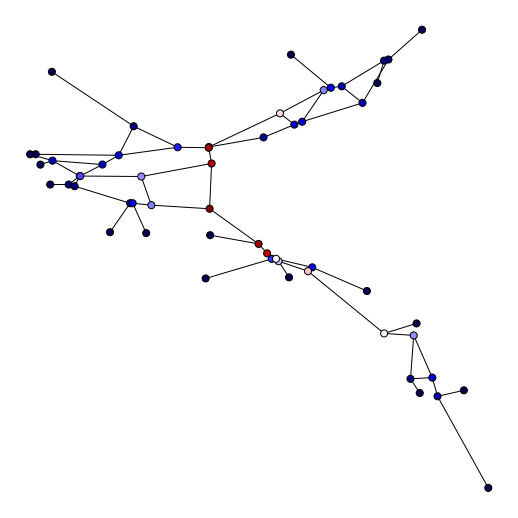

In [4]:
# initials networkX and add nodes and edges
G = nx.Graph()
G.add_nodes_from(all_nodes)
print("number of nodes:", G.number_of_nodes())
G.add_weighted_edges_from(all_id_pairs_and_weights)
print("number of edges:", G.number_of_edges())

# define lists with positions in dict "pos"
# keys: node_id and value numpy.array[(x,y)]
node_entries = df.loc[(df.model_type == "SourceSink") | (df.model_type == "Intersection")]
pos = {}
for index, row in node_entries.iterrows():
    pos[row.id] = np.array([row.lon, row.lat])

# calculate betweenness centrality and make a dataframe mapping nodes to betweenness centrality
bcentdict = nx.betweenness_centrality(G, k=None, normalized=False, weight=None, endpoints=False, seed=None)
bcent_values = list(bcentdict.values())
bcent_nodes = list(bcentdict.keys())
carac = pd.DataFrame({ 'ID':bcent_nodes , 'bcent': bcent_values})
       
plt.figure(figsize=(7, 7))
nx.draw(G, pos, node_size=50, font_size=8, edgecolors="black", node_color=carac['bcent'].astype(int), cmap=plt.cm.seismic)

# specify edge labels explicitly
edge_labels=dict([((u,v,),d['weight'])
for u,v,d in G.edges(data=True)])
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
#nx.draw_networkx_labels(G, pos, font_size=8)

# visualize
plt.savefig("A3_network.pdf", dpi=1000)
plt.show()

In [5]:
# prepare lists to make into dataframe columns
bcentdict = nx.betweenness_centrality(G, k=None, normalized=False, weight=None, endpoints=False, seed=None)
bcent_values = list(bcentdict.values())
bcent_nodes = list(bcentdict.keys())
descriptions = []

# initialize dataframe
columns = ["Component ID", "Betweenness Centrality", "Road & Description"]
bcentdf =  pd.DataFrame(columns=columns)

# find the road and description that corresponds to each node
for i in range(len(bcent_nodes)):
    for index, row in df.iterrows():
        if bcent_nodes[i] == row["id"]:
            string = str(row["road"])+ ": "+ str(row["name"])
            descriptions.append(string)
            break

# define each column of dataframe
bcentdf["Component ID"] = bcent_nodes
bcentdf["Betweenness Centrality"] = bcent_values
bcentdf["Road & Description"] = descriptions

# order components according to their betweenness centrality
bcentdf.sort_values(by='Betweenness Centrality', ascending=False, inplace=True)
bcentdf.reset_index(inplace=True, drop=True)

# save results to csv
bcentdf.to_csv("network_betweenness_centralities.csv", index=False)
bcentdf

,Component ID,Betweenness Centrality,Road & Description
0,251,764.000000,N1: Road to Brahmanbaria(N102)
1,393,721.000000,N1: Road to Nangolhat (Z1048)
2,2937,708.000000,N102: Meet with N2 at Sanail
3,2219,682.500000,N102: R203 on left to Nabinagar
4,437,663.000000,N1: Road to Karerhat (Z1031)
5,2939,560.500000,N2: Road to Nasimagar(R220)
6,500,425.000000,N1: Road to Karerhat (R151)
7,5719,406.833333,R220: Road end with R240 at muktijoddha chotor...
8,2276,392.666667,N104: Intersection with Z1031 & Z1034
9,817,391.000000,N1: Road to Balakkhati (Z1065)
